In [74]:
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import scipy.special as sc
import scipy.fftpack
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.01, N*T, N)
beta = 1.0
y_old = np.sin(100.0 * 2.0*np.pi*x+beta*np.sin(50.0 * 2.0*np.pi*x))
y = 0*x;
xf = fftfreq(N, 1 / 400)
for k in range (-5, 5):
    y = sc.jv(k,beta)*np.sin((100.0+k*50) * 2.0*np.pi*x)
    yf = fft(y)
    plt.plot(xf, np.abs(yf))

axamp = plt.axes(np.linspace(0.1, 3, 10))
beta_slider = Slider(
ax=axamp,
label="Amplitude",
valmin=0,
valmax=10,
valinit=beta,
orientation="vertical"
)
plt.show()

yf_old = fft(y_old)
plt.plot(xf, np.abs(yf_old))
plt.show()


ValueError: operands could not be broadcast together with shapes (3,) (600,) 

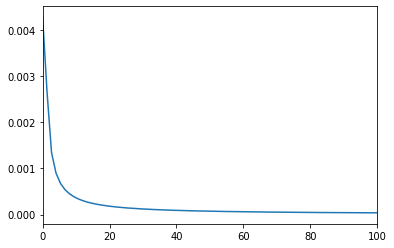

In [72]:

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = sc.jv(3,x)#np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.set(
    xlim=(0, 100)
)
plt.show()


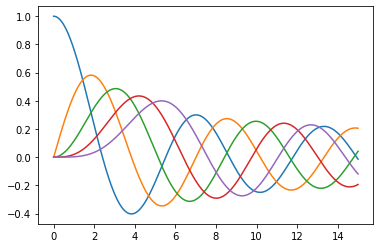

In [73]:

for n in range (5):
    x = np.linspace(0,15,1000)
    y = sc.jv(n,x)
    plt.plot(x, y, '-')
plt.show()

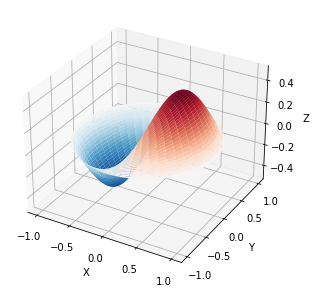

In [7]:
from scipy import special

def drumhead_height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]
   return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)

theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')

plt.show()